In [1]:
'''SELECT TOP 50000 Title, Body, Tags, Id, Score, ViewCount, FavoriteCount, AnswerCount
FROM Posts 
WHERE PostTypeId = 1 AND ViewCount > 10 AND FavoriteCount > 10 AND AnswerCount > 0
AND Score > 5 AND AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5'''

"SELECT TOP 50000 Title, Body, Tags, Id, Score, ViewCount, FavoriteCount, AnswerCount\nFROM Posts \nWHERE PostTypeId = 1 AND ViewCount > 10 AND FavoriteCount > 10 AND AnswerCount > 0\nAND Score > 5 AND AnswerCount > 0 AND LEN(Tags) - LEN(REPLACE(Tags, '<','')) >= 5"

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'/Users/stanislasbocearov/Downloads/QueryResults_2.csv')

# Exploration

In [3]:
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,ggplot: arranging boxplots of multiple y-varia...,<p>I would like to create boxplots of multiple...,<r><ggplot2><boxplot><continuous><r-factor>,21388845,18,49066,13,1
1,How do I get the path of a process in Unix / L...,<p>In Windows environment there is an API to o...,<linux><unix><process><path><environment>,606041,155,234389,58,11
2,How to detect using c# if a pendrive is plugge...,<p>Is there a way to find out when in a LAN an...,<c#><windows><usb><monitoring><usb-flash-drive>,271907,13,22142,15,4
3,How to set up unit testing for Visual Studio C++,<p>I'm having trouble figuring out how to get ...,<c++><unit-testing><testing><visual-studio-200...,3150,94,61403,43,12
4,Absolute path back to web-relative path,<p>If I have managed to locate and verify the ...,<c#><asp.net><.net><path><mappath>,3164,66,58717,20,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27588 entries, 0 to 27587
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27588 non-null  object
 1   Body           27588 non-null  object
 2   Tags           27588 non-null  object
 3   Id             27588 non-null  int64 
 4   Score          27588 non-null  int64 
 5   ViewCount      27588 non-null  int64 
 6   FavoriteCount  27588 non-null  int64 
 7   AnswerCount    27588 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()

Title            0
Body             0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [6]:
#there is no duplicated values for the id column
df[df['Id'].duplicated()]

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount


(0.0, 250.0)

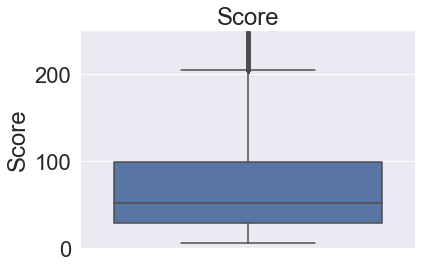

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)
sns.boxplot(y=df['Score'])
plt.title("Score")
plt.ylim([0,250])

Text(0, 0.5, 'Number of scores with this value')

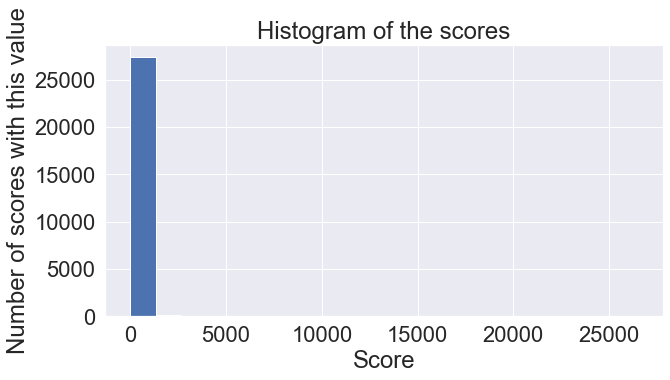

In [8]:
df['Score'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the scores")
plt.xlabel("Score")
plt.ylabel("Number of scores with this value")

Text(0, 0.5, 'Number of scores with this value')

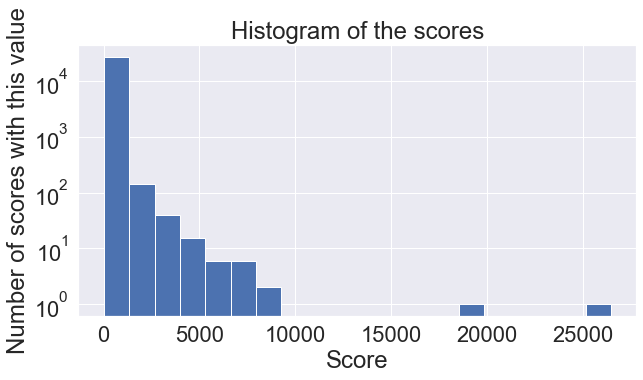

In [9]:
df["Score"].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the scores")
plt.yscale('log')
plt.xlabel("Score")
plt.ylabel("Number of scores with this value")

(0.0, 300000.0)

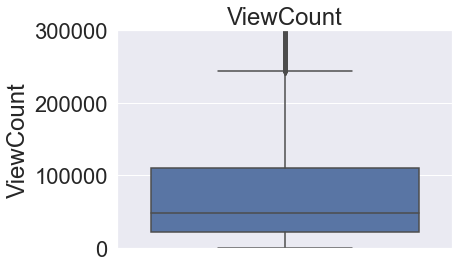

In [10]:
sns.boxplot(y=df['ViewCount'])
plt.title("ViewCount")
plt.ylim([0,300000])

Text(0, 0.5, 'Number of ViewCount with this value')

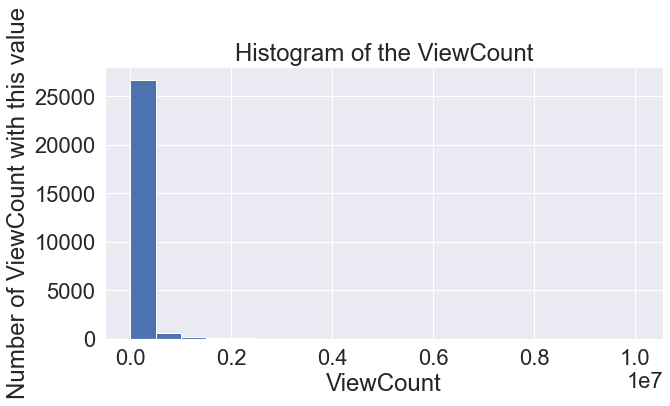

In [11]:
df['ViewCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the ViewCount")
plt.xlabel("ViewCount")
plt.ylabel("Number of ViewCount with this value")

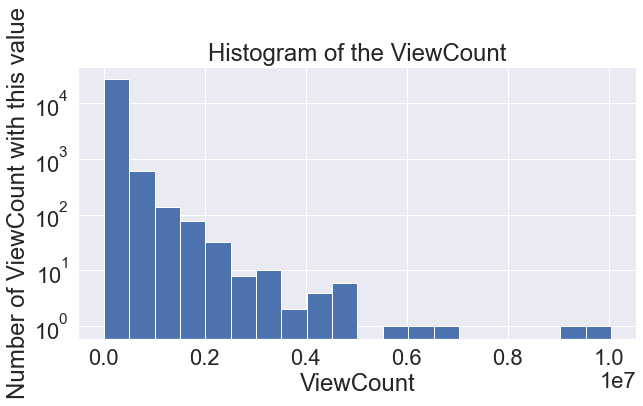

In [12]:
df["ViewCount"].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the ViewCount")
plt.xlabel("ViewCount")
plt.ylabel("Number of ViewCount with this value")
plt.yscale('log')

(0.0, 100.0)

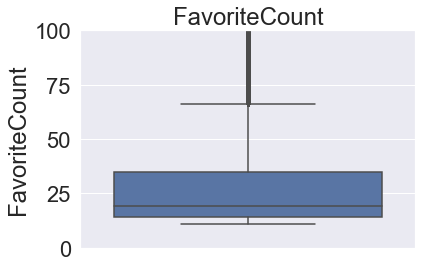

In [13]:
sns.boxplot(y=df['FavoriteCount'])
plt.title("FavoriteCount")
plt.ylim([0,100])

Text(0, 0.5, 'Number of FavoriteCount with this value')

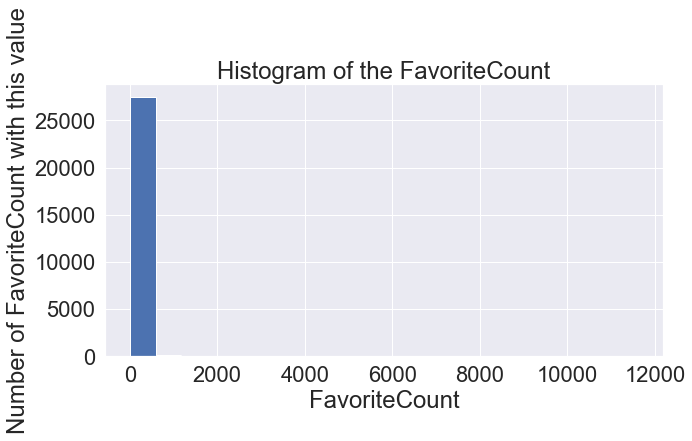

In [14]:
df['FavoriteCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the FavoriteCount")
plt.xlabel("FavoriteCount")
plt.ylabel("Number of FavoriteCount with this value")

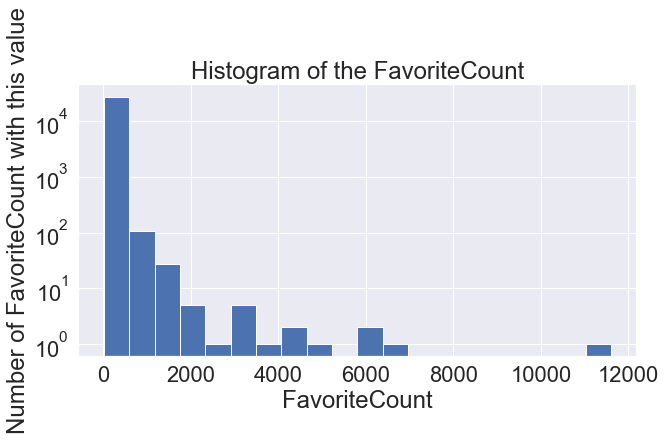

In [15]:
df['FavoriteCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the FavoriteCount")
plt.xlabel("FavoriteCount")
plt.ylabel("Number of FavoriteCount with this value")
plt.yscale('log')

(0.0, 25.0)

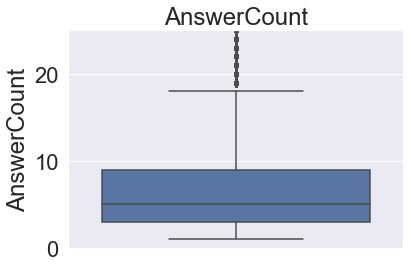

In [16]:
sns.boxplot(y=df['AnswerCount'])
plt.title("AnswerCount")
plt.ylim([0,25])

Text(0, 0.5, 'Number of AnswerCount with this value')

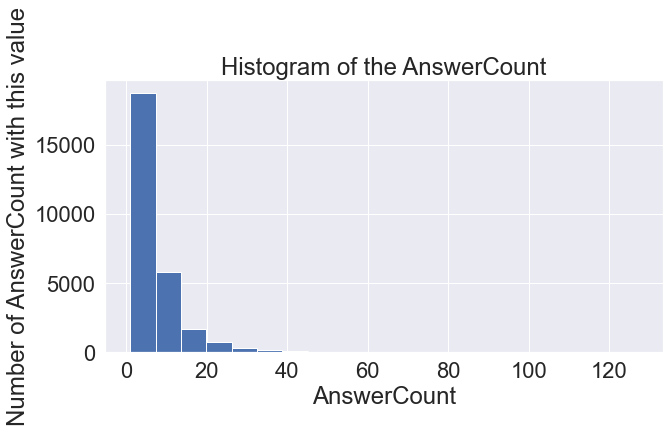

In [17]:
df['AnswerCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the AnswerCount")
plt.xlabel("AnswerCount")
plt.ylabel("Number of AnswerCount with this value")

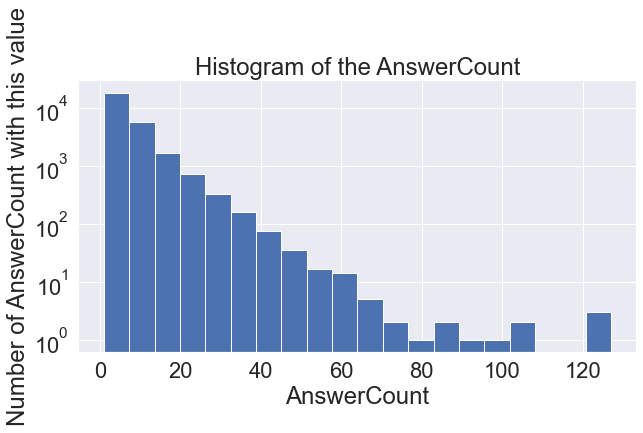

In [18]:
df['AnswerCount'].hist(bins=20, figsize=(10, 5))
plt.title("Histogram of the AnswerCount")
plt.xlabel("AnswerCount")
plt.ylabel("Number of AnswerCount with this value")
plt.yscale('log')

# Cleaning

In [19]:
import re

In [20]:
re.findall('<(.*?)>', '<java><spring><jpa><spring-data><spring-data-jpa>')

['java', 'spring', 'jpa', 'spring-data', 'spring-data-jpa']

In [21]:
from tqdm import tqdm

In [22]:
tqdm.pandas()

In [23]:
tags = df['Tags'].progress_apply(lambda x: re.findall('<(.*?)>', x))

100%|█████████████████████████████████| 27588/27588 [00:00<00:00, 148592.77it/s]


In [24]:
tags

0              [r, ggplot2, boxplot, continuous, r-factor]
1                [linux, unix, process, path, environment]
2          [c#, windows, usb, monitoring, usb-flash-drive]
3        [c++, unit-testing, testing, visual-studio-200...
4                       [c#, asp.net, .net, path, mappath]
                               ...                        
27583         [linux, centos, vagrant, virtualbox, redhat]
27584    [python, macos, terminal, atom-editor, macos-m...
27585    [c++, pointers, language-lawyer, void-pointers...
27586    [assembly, optimization, x86-64, cpu-architect...
27587    [python, string, reference, immutability, stri...
Name: Tags, Length: 27588, dtype: object

In [25]:
tags_dataframe = df['Tags'].progress_apply(lambda x: re.findall('<(.*?)>', x)).progress_apply(pd.Series)

100%|███████████████████████████████████| 27588/27588 [00:03<00:00, 7177.81it/s]


In [26]:
tags_dataframe

,0,1,2,3,4
0,r,ggplot2,boxplot,continuous,r-factor
1,linux,unix,process,path,environment
2,c#,windows,usb,monitoring,usb-flash-drive
3,c++,unit-testing,testing,visual-studio-2008,frameworks
4,c#,asp.net,.net,path,mappath
...,...,...,...,...,...
27583,linux,centos,vagrant,virtualbox,redhat
27584,python,macos,terminal,atom-editor,macos-monterey
27585,c++,pointers,language-lawyer,void-pointers,pointer-conversion
27586,assembly,optimization,x86-64,cpu-architecture,simd


In [27]:
tags_dataframe.value_counts()

0               1             2                 3                 4                        
java            spring        jpa               spring-data       spring-data-jpa              19
python          apache-spark  dataframe         pyspark           apache-spark-sql             16
javascript      jquery        html              css               twitter-bootstrap            12
python          image         opencv            image-processing  computer-vision               9
                tensorflow    machine-learning  keras             deep-learning                 8
                                                                                               ..
google-chrome   firefox       browser           video-streaming   media-source                  1
                download      executable        signing           authenticode                  1
                debugging     developer-tools   xdotool           firefox-developer-edition     1
                curl      

In [28]:
tags = tags_dataframe.stack()

In [29]:
tags

0      0                       r
       1                 ggplot2
       2                 boxplot
       3              continuous
       4                r-factor
                    ...         
27587  0                  python
       1                  string
       2               reference
       3            immutability
       4    string-concatenation
Length: 137940, dtype: object

In [30]:
tags.value_counts()

python                3129
java                  3094
javascript            2739
c#                    2673
ios                   2410
                      ... 
graphic-effects          1
chromebook               1
google-chrome-os         1
protected-resource       1
pointer-conversion       1
Length: 12530, dtype: int64

In [31]:
pd.set_option("display.max_colwidth", None)
df['Body'].sample(1)

8160    <p>I would like to use named entity recognition (NER) to find adequate tags for texts in a database.</p>\n\n<p>I know there is a Wikipedia article about this and lots of other pages describing NER, I would preferably hear something about this topic from you:</p>\n\n<ul>\n<li>What experiences did you make with the various algorithms?</li>\n<li>Which algorithm would you recommend?</li>\n<li>Which algorithm is the easiest to implement (PHP/Python)?</li>\n<li>How to the algorithms work? Is manual training necessary?</li>\n</ul>\n\n<p>Example:</p>\n\n<p>"Last year, I was in London where I saw Barack Obama." => Tags: London, Barack Obama</p>\n\n<p>I hope you can help me. Thank you very much in advance!</p>\n
Name: Body, dtype: object

In [32]:
from bs4 import BeautifulSoup
df['Body'][0]

'<p>I would like to create boxplots of multiple variables for groups of a continuous x-variable. The boxplots should be arranged next to each other for each group of x.</p>\n\n<p>The data looks like this:</p>\n\n<pre><code>require (ggplot2)\nrequire (plyr)\nlibrary(reshape2)\n\nset.seed(1234)\nx   &lt;- rnorm(100)\ny.1 &lt;- rnorm(100)\ny.2 &lt;- rnorm(100)\ny.3 &lt;- rnorm(100)\ny.4 &lt;- rnorm(100)\n\ndf &lt;- as.data.frame(cbind(x,y.1,y.2,y.3,y.4))\n</code></pre>\n\n<p>which I then melted</p>\n\n<pre><code>dfmelt &lt;- melt(df, measure.vars=2:5)    \n</code></pre>\n\n<p>The facet_wrap as shown in this solution (\n<a href="https://stackoverflow.com/questions/10987193/multiple-plots-by-factor-in-ggplot-facets">Multiple plots by factor in ggplot (facets)</a>)\ngives me out each variable in an individual plot, but I would like to have the boxplots of each variable next to each other for each bin of x in one diagram.</p>\n\n<pre><code>ggplot(dfmelt, aes(value, x, group = round_any(x, 0.5

In [33]:
df['Body'] = df['Body'].progress_apply(lambda text: BeautifulSoup(text, 'html.parser').get_text())

100%|███████████████████████████████████| 27588/27588 [00:13<00:00, 2056.42it/s]


In [34]:
df['Body'][0]

'I would like to create boxplots of multiple variables for groups of a continuous x-variable. The boxplots should be arranged next to each other for each group of x.\nThe data looks like this:\nrequire (ggplot2)\nrequire (plyr)\nlibrary(reshape2)\n\nset.seed(1234)\nx   <- rnorm(100)\ny.1 <- rnorm(100)\ny.2 <- rnorm(100)\ny.3 <- rnorm(100)\ny.4 <- rnorm(100)\n\ndf <- as.data.frame(cbind(x,y.1,y.2,y.3,y.4))\n\nwhich I then melted\ndfmelt <- melt(df, measure.vars=2:5)    \n\nThe facet_wrap as shown in this solution (\nMultiple plots by factor in ggplot (facets))\ngives me out each variable in an individual plot, but I would like to have the boxplots of each variable next to each other for each bin of x in one diagram.\nggplot(dfmelt, aes(value, x, group = round_any(x, 0.5), fill=variable))+\ngeom_boxplot() + \ngeom_jitter() + \nfacet_wrap(~variable)\n\n\nThis shows the y-variables next to each other but does not bin x.\nggplot(dfmelt) +\ngeom_boxplot(aes(x=x,y=value,fill=variable))+\nface

In [35]:
import spacy
import nltk

In [36]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
punkt_mod = "".join([i for i in string.punctuation if i not in ['#', '+']])

In [38]:
punkt_mod

'!"$%&\'()*,-./:;<=>?@[\\]^_`{|}~'

In [39]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in punkt_mod])
    return punctuationfree

In [40]:
df['no_punctuation_title'] = df['Title'].apply(lambda x:remove_punctuation(x))

In [41]:
df['no_punctuation_title']

0                                           ggplot arranging boxplots of multiple yvariables for each group of a continuous x
1                                                                           How do I get the path of a process in Unix  Linux
2                                                             How to detect using c# if a pendrive is plugged into a USB port
3                                                                            How to set up unit testing for Visual Studio C++
4                                                                                      Absolute path back to webrelative path
                                                                 ...                                                         
27583                                                                              CentOS through a VM  no URLs in mirrorlist
27584    How can I fix the zsh command not found python error macOS Monterey 123 Pythonnbsp310 Atom IDE and atompython

In [42]:
#text to lower cases
df['title_lower'] = df['no_punctuation_title'].apply(lambda x: x.lower())

In [43]:
tokenizer = nltk.tokenize.SpaceTokenizer()  # prevent c# from being tokenized as ['c', '#'] (WordTokenizer)

In [44]:
#tokenizing the column title
df['tokenized_title'] = df['title_lower'].apply(lambda x: tokenizer.tokenize(x))

In [45]:
#to remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [46]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [47]:
df['no_stopwords_title'] = df['tokenized_title'].apply(lambda x:remove_stopwords(x))

In [48]:
#Stemming to compare with Lemmatization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [49]:
def stemming(text):
    stem_text = [stemmer.stem(word) for word in text] # Stem every word.
    return stem_text

In [50]:
df['title_stemmed'] = df['no_stopwords_title'].apply(lambda x:stemming(x))

In [51]:
df['title_stemmed']

0                                                     [ggplot, arrang, boxplot, multipl, yvariabl, group, continu, x]
1                                                                                 [get, path, process, unix, , linux]
2                                                                         [detect, use, c#, pendriv, plug, usb, port]
3                                                                              [set, unit, test, visual, studio, c++]
4                                                                                 [absolut, path, back, webrel, path]
                                                             ...                                                     
27583                                                                                  [cento, vm, , url, mirrorlist]
27584    [fix, zsh, command, found, python, error, maco, monterey, 123, pythonnbsp310, atom, ide, atompythonrun, 097]
27585                                                   

In [52]:
joining_stemmed = df['title_stemmed'].apply(lambda x: " ".join(x)) 

In [53]:
joining_stemmed

0                                               ggplot arrang boxplot multipl yvariabl group continu x
1                                                                         get path process unix  linux
2                                                                  detect use c# pendriv plug usb port
3                                                                      set unit test visual studio c++
4                                                                        absolut path back webrel path
                                                     ...                                              
27583                                                                         cento vm  url mirrorlist
27584    fix zsh command found python error maco monterey 123 pythonnbsp310 atom ide atompythonrun 097
27585                                                                                 pointer size c++
27586                                         code execut slowli strength

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_stemmed = tfidf.fit_transform(joining_stemmed)

In [55]:
from sklearn.manifold import TSNE
%time x_embedded_stem = TSNE(n_components=2, init='random').fit_transform(X_stemmed)

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 23min 33s, sys: 1min 34s, total: 25min 7s
Wall time: 4min 2s


<AxesSubplot:>

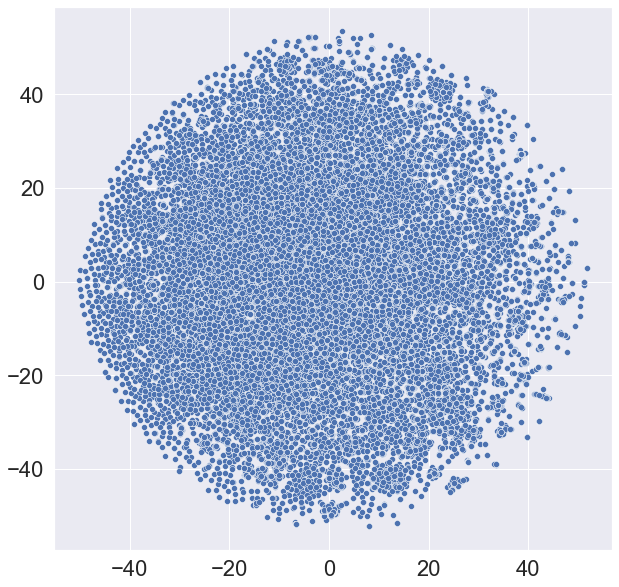

In [56]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=x_embedded_stem[:, 0], y=x_embedded_stem[:, 1],
                palette=sns.color_palette("hls", 3))

In [57]:
#Doing Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [58]:
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [59]:
df['title_lemmatized'] = df['no_stopwords_title'].apply(lambda x:lemmatizer(x))

In [60]:
'''# finding bi grams
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
phrase_model_title = Phrases(df['title_lemmatized'],min_count=1, threshold=3, connector_words=ENGLISH_CONNECTOR_WORDS)'''

"# finding bi grams\nfrom gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS\nphrase_model_title = Phrases(df['title_lemmatized'],min_count=1, threshold=3, connector_words=ENGLISH_CONNECTOR_WORDS)"

In [61]:
'''title_bg = [phrase_model_title[item] for item in df['title_lemmatized']]'''

"title_bg = [phrase_model_title[item] for item in df['title_lemmatized']]"

In [62]:
'''df['title_bg'] = title_bg'''

"df['title_bg'] = title_bg"

In [63]:
joining_lemm = df['title_lemmatized'].apply(lambda x: " ".join(x))
X_lemm = tfidf.fit_transform(joining_lemm)

In [64]:
%time x_embedded_lemm = TSNE(n_components=2, init='random').fit_transform(X_lemm)

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 23min 40s, sys: 1min 34s, total: 25min 15s
Wall time: 4min 49s


(-100.0, 100.0)

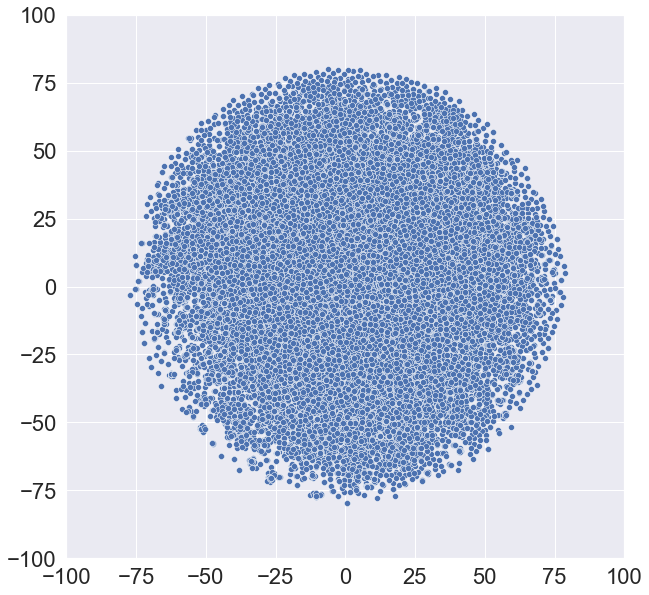

In [248]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=x_embedded_lemm[:, 0], y=x_embedded_lemm[:, 1],
                palette=sns.color_palette("hls", 3))
plt.xlim([-100,100])
plt.ylim([-100,100])

In [66]:
#Cleaning the body column
df['no_punctuation_body'] = df['Body'].apply(lambda x:remove_punctuation(x))

In [67]:
df['body_lower'] = df['no_punctuation_body'].apply(lambda x: x.lower())

In [68]:
df['tokenized_body'] = df['body_lower'].apply(lambda x: tokenizer.tokenize(x))

In [69]:
df['no_stopwords_body'] = df['tokenized_body'].apply(lambda x:remove_stopwords(x))

In [70]:
df['body_lemmatized'] = df['no_stopwords_body'].apply(lambda x:lemmatizer(x))

In [71]:
'''phrase_model_body = Phrases(df['body_lemmatized'], min_count=1, threshold=3, connector_words=ENGLISH_CONNECTOR_WORDS)'''

"phrase_model_body = Phrases(df['body_lemmatized'], min_count=1, threshold=3, connector_words=ENGLISH_CONNECTOR_WORDS)"

In [72]:
'''body_cleaned_bg = [phrase_model_body[item] for item in df['body_lemmatized']]'''

"body_cleaned_bg = [phrase_model_body[item] for item in df['body_lemmatized']]"

In [73]:
'''df['body_cleaned_bg'] = body_cleaned_bg'''

"df['body_cleaned_bg'] = body_cleaned_bg"

In [74]:
df.sample(2)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,no_punctuation_title,title_lower,tokenized_title,no_stopwords_title,title_stemmed,title_lemmatized,no_punctuation_body,body_lower,tokenized_body,no_stopwords_body,body_lemmatized
22897,How to rotate image in Swift?,"I am unable to rotate the image by 90 degrees in swift. I have written below code but there is an error and doesn't compile\n func imageRotatedByDegrees(oldImage: UIImage, deg degrees: CGFloat) -> UIImage {\n\n //Calculate the size of the rotated view's containing box for our drawing space\n let rotatedViewBox: UIView = UIView(frame: CGRect(x: 0, y: 0, width: oldImage.size.width, height: oldImage.size.height))\n let t: CGAffineTransform = CGAffineTransform(rotationAngle: degrees * CGFloat(M_PI / 180))\n rotatedViewBox.transform = t\n let rotatedSize: CGSize = rotatedViewBox.frame.size\n\n //Create the bitmap context\n UIGraphicsBeginImageContext(rotatedSize)\n let bitmap: CGContext = UIGraphicsGetCurrentContext()!\n\n //Move the origin to the middle of the image so we will rotate and scale around the center.\n bitmap.translateBy(x: rotatedSize.width / 2, y: rotatedSize.height / 2)\n\n //Rotate the image context\n bitmap.rotate(by: (degrees * CGFloat(M_PI / 180)))\n\n //Now, draw the rotated/scaled image into the context\n bitmap.scaleBy(x: 1.0, y: -1.0)\n bitmap.draw(oldImage, in: CGRect(origin: (x: -oldImage.size.width / 2, y: -oldImage.size.height / 2, width: oldImage.size.width, height: oldImage.size.height), size: oldImage.cgImage))\n\n let newImage: UIImage = UIGraphicsGetImageFromCurrentImageContext()!\n UIGraphicsEndImageContext()\n\n return newImage\n\n }\n\nbelow is the code i am not sure about\nbitmap.draw(oldImage, in: CGRect(origin: (x: -oldImage.size.width / 2, y: -oldImage.size.height / 2, width: oldImage.size.width, height: oldImage.size.height), size: oldImage.cgImage))\n\n",<ios><swift><animation><uiview><uiviewanimation>,40882487,69,117971,15,15,How to rotate image in Swift,how to rotate image in swift,"[how, to, rotate, image, in, swift]","[rotate, image, swift]","[rotat, imag, swift]","[rotate, image, swift]",I am unable to rotate the image by 90 degrees in swift I have written below code but there is an error and doesnt compile\n func imageRotatedByDegreesoldImage UIImage deg degrees CGFloat UIImage \n\n Calculate the size of the rotated views containing box for our drawing space\n let rotatedViewBox UIView UIViewframe CGRectx 0 y 0 width oldImagesizewidth height oldImagesizeheight\n let t CGAffineTransform CGAffineTransformrotationAngle degrees CGFloatMPI 180\n rotatedViewBoxtransform t\n let rotatedSize CGSize rotatedViewBoxframesize\n\n Create the bitmap context\n UIGraphicsBeginImageContextrotatedSize\n let bitmap CGContext UIGraphicsGetCurrentContext\n\n Move the origin to the middle of the image so we will rotate and scale around the center\n bitmaptranslateByx rotatedSizewidth 2 y rotatedSizeheight 2\n\n Rotate the image context\n bitmaprotateby degrees CGFloatMPI 180\n\n Now draw the rotatedscaled image into the context\n bitmapscaleByx 10 y 10\n bitmapdrawoldImage in CGRectorigin x oldImagesizewidth 2 y oldImagesizeheight 2 width oldImagesizewidth height oldImagesizeheight size oldImagecgImage\n\n let newImage UIImage UIGraphicsGetImageFromCurrentImageContext\n UIGraphicsEndImageContext\n\n return newImage\n\n \n\nbelow is the code i am not sure about\nbitmapdrawoldImage in CGRectorigin x oldImagesizewidth 2 y oldImagesizeheight 2 width oldImagesizewidth height oldImagesizeheight size oldImagecgImage\n\n,i am unable to rotate the image by 90 degrees in swift i have written below code but there is an error and doesnt compile\n func imagerotatedbydegreesoldimage uiimage deg degrees cgfloat uiimage \n\n calculate the size of the rotated views containing box for our drawing space\n let rotatedviewbox uiview uiviewframe cgrectx 0 y 0 width oldimagesizewidth height oldimagesizeheight\n let t cgaffinetransform cgaffinetransformrota

In [75]:
x_cleaned = df['body_lemmatized'] + df['title_lemmatized']

In [76]:
x_str = x_cleaned.apply(lambda x: " ".join(x)) 

In [77]:
x_str[:2]

0    would like create boxplots multiple variable group continuous xvariable boxplots arranged next group x data look like require ggplot2 require plyr libraryreshape2 setseed1234 x rnorm100 y1 rnorm100 y2 rnorm100 y3 rnorm100 y4 rnorm100 df asdataframecbindxy1y2y3y4 melted dfmelt meltdf measurevars25 facetwrap shown solution multiple plot factor ggplot facet give variable individual plot would like boxplots variable next bin x one diagram ggplotdfmelt aesvalue x group roundanyx 05 fillvariable+ geomboxplot + geomjitter + facetwrapvariable show yvariables next bin x ggplotdfmelt + geomboxplotaesxxyvaluefillvariable+ facetgridvariable would like produce plot bin x changed added ggplot arranging boxplots multiple yvariables group continuous x
1                                                                                                                                                                                                                                                        

In [78]:
df = df.reset_index(drop=True)

In [79]:
df

Title  \
0                                                         ggplot: arranging boxplots of multiple y-variables for each group of a continuous x   
1                                                                                          How do I get the path of a process in Unix / Linux   
2                                                                            How to detect using c# if a pendrive is plugged into a USB port?   
3                                                                                            How to set up unit testing for Visual Studio C++   
4                                                                                                     Absolute path back to web-relative path   
...                                                                                                                                       ...   
27583                                                                                             CentOS through a VM - no URLs in mirrorlist   
27584  How can I fix the "zsh: command not found: python" error? (macOS Monterey 12.3, Python&nbsp;3.10, Atom IDE, and atom-python-run 0.9.7)   
27585                                                                                              Do all pointers have the same size in C++?   
27586                               Why does this code execute more slowly after strength-reducing multiplications to loop-carried additions?   
27587                                              If Python strings are immutable, why does it keep the same id if I use += to append to it?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x_str)

In [81]:
import joblib

In [82]:
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [83]:
X.shape

(27588, 266619)

In [84]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
x_reduced = svd.fit_transform(X)

In [85]:
joblib.dump(svd, "svd.pkl")

['svd.pkl']

In [86]:
x_reduced.shape

(27588, 100)

In [87]:
print(f"The explained variance ratio is {svd.explained_variance_ratio_}")
print(f"The explance variance ratio sum is {svd.explained_variance_ratio_.sum()}")
print(f"The singular values are {svd.singular_values_}")

The explained variance ratio is [0.00203899 0.00411146 0.0033869  0.00311246 0.00284601 0.00266927
 0.00249479 0.00235609 0.00213357 0.0021153  0.00196784 0.00194009
 0.00185706 0.00178532 0.00175511 0.00170798 0.00167038 0.00164443
 0.00163566 0.00159645 0.00158444 0.00154566 0.00154336 0.00149859
 0.00149174 0.00145854 0.00141945 0.00140561 0.00138886 0.00136768
 0.00135593 0.00135049 0.00133701 0.00129815 0.00128348 0.00128067
 0.00127369 0.00126151 0.00124124 0.00122647 0.00121545 0.00120599
 0.00119052 0.0011821  0.00116275 0.00114865 0.00112878 0.00112551
 0.00112228 0.00111042 0.00109481 0.00108825 0.00107854 0.00107109
 0.00106598 0.00106221 0.00105619 0.0010364  0.00102598 0.00101521
 0.00100933 0.00100447 0.00098881 0.0009818  0.0009788  0.00097401
 0.00095894 0.0009567  0.00095045 0.00093985 0.00093277 0.00092965
 0.00092333 0.00091592 0.00090549 0.00089969 0.00089026 0.00088589
 0.00087863 0.00087462 0.00086603 0.00086324 0.00085657 0.00084814
 0.00083958 0.00083863 0.00082

In [88]:
tags_dataframe[:12]

,0,1,2,3,4
0,r,ggplot2,boxplot,continuous,r-factor
1,linux,unix,process,path,environment
2,c#,windows,usb,monitoring,usb-flash-drive
3,c++,unit-testing,testing,visual-studio-2008,frameworks
4,c#,asp.net,.net,path,mappath
5,javascript,angular,typescript,rxjs,rxjs6
6,javascript,html,css,textarea,prototypejs
7,web-applications,stress-testing,performance,webapplicationstresstool,pylot
8,wcf,security,rest,authorization,rest-security
9,java,windows,swt,executable,software-distribution


In [89]:
tags_dataframe.isin(['java'])[:12]

,0,1,2,3,4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,True,False,False,False,False


In [90]:
boolean_java_tags = tags_dataframe.isin(['java'])

In [91]:
#axis=1 to check row by row instead of the columns
target_tags = boolean_java_tags.apply(lambda x: np.any(x), axis=1)

In [92]:
target_tags.value_counts()

False    24494
True      3094
dtype: int64

In [93]:
target_df = target_tags.to_frame()

In [94]:
df = pd.merge(df, target_df, left_index=True, right_index=True)

In [95]:
df = df.rename(columns={0: 'java_boolean'})

In [96]:
df['java_boolean'] = (df['java_boolean']).apply(lambda x: int(x))

In [97]:
y = df['java_boolean']

In [98]:
y

0        0
1        0
2        0
3        0
4        0
        ..
27583    0
27584    0
27585    0
27586    0
27587    0
Name: java_boolean, Length: 27588, dtype: int64

In [99]:
y.value_counts()

0    24494
1     3094
Name: java_boolean, dtype: int64

# Binary Logistic Regression

In [100]:
#We are doing a resampling to get a balanced dataset
df_resampled = pd.concat([df[df["java_boolean"] == 0].sample(3094), df[df["java_boolean"] == 1].sample(3094)])

In [101]:
df_resampled = df_resampled.sample(frac=1).copy()

In [102]:
df_resampled.index

Int64Index([16573,  8709, 15022, 12797,   767, 13774,  4451,  8685, 20952,
            14760,
            ...
            12112, 19182, 12507, 15935,  4093, 21602, 20619,  3235, 15997,
            14518],
           dtype='int64', length=6188)

In [103]:
x_reduced[1,:]

array([ 1.07868268e-01, -7.74827878e-02,  2.74318038e-02, -4.17369921e-02,
       -1.60567960e-02, -4.12982542e-02, -1.25471037e-02,  3.30970543e-02,
        3.63796537e-02,  6.95996739e-03,  4.68511655e-02,  8.57433713e-02,
        1.20694075e-01,  2.20278745e-02,  2.84850817e-02,  9.08456666e-03,
       -6.48252424e-02,  5.46654030e-02, -4.82165448e-02,  6.87820078e-02,
        3.07019331e-02,  3.87528431e-02, -2.36444360e-02,  7.57903699e-03,
       -8.71526169e-02, -4.18291169e-02,  2.82256520e-02, -6.07734918e-02,
        1.11963890e-02,  4.10745368e-02, -3.03857717e-02,  8.67520215e-02,
       -2.46922469e-02, -2.96093313e-03, -4.46388425e-02, -3.18885824e-02,
       -7.59923018e-03,  3.41530921e-02, -5.03553844e-02, -2.06754071e-03,
       -8.13330642e-03,  9.87489395e-03, -1.23688611e-02, -6.40078292e-02,
        2.53702675e-02, -3.66663643e-02, -9.76698115e-05, -2.63454242e-02,
       -7.00919646e-03, -3.01331028e-03,  3.39879342e-02, -1.86542340e-02,
       -6.67465939e-02,  

In [104]:
x_reduced_resampled = x_reduced[df_resampled.index, :]  # because df index is same as line numbers

In [105]:
y = df_resampled["java_boolean"]

In [106]:
y.index

Int64Index([16573,  8709, 15022, 12797,   767, 13774,  4451,  8685, 20952,
            14760,
            ...
            12112, 19182, 12507, 15935,  4093, 21602, 20619,  3235, 15997,
            14518],
           dtype='int64', length=6188)

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_reduced_resampled, y, test_size=0.2, random_state=42)

In [251]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

LogisticRegression()

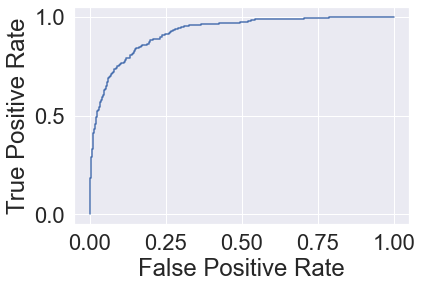

In [252]:
#plotting the ROC curve
from sklearn import metrics
y_pred_proba = log_regression.predict_proba(X_test)[:,1]
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [253]:
y_pred_proba

array([0.15181683, 0.6131946 , 0.2382493 , ..., 0.28553878, 0.98672207,
       0.91763781])

In [111]:
tpr

array([0.        , 0.00168634, 0.13490725, 0.13490725, 0.1703204 ,
       0.1703204 , 0.18212479, 0.18212479, 0.18718381, 0.18718381,
       0.28836425, 0.28836425, 0.29005059, 0.29005059, 0.33052277,
       0.33052277, 0.37436762, 0.37436762, 0.41315346, 0.41315346,
       0.43001686, 0.43001686, 0.44519393, 0.44519393, 0.45699831,
       0.45699831, 0.4688027 , 0.4688027 , 0.49072513, 0.49072513,
       0.49578415, 0.49578415, 0.52445194, 0.52445194, 0.52782462,
       0.52782462, 0.5311973 , 0.5311973 , 0.53794266, 0.53794266,
       0.54300169, 0.54300169, 0.54806071, 0.54806071, 0.5682968 ,
       0.5682968 , 0.57504216, 0.57504216, 0.57841484, 0.57841484,
       0.59190556, 0.59190556, 0.60370995, 0.60370995, 0.62731872,
       0.62731872, 0.62900506, 0.62900506, 0.63237774, 0.63237774,
       0.63575042, 0.63575042, 0.64924115, 0.64924115, 0.65935919,
       0.65935919, 0.67116358, 0.67116358, 0.67284992, 0.67284992,
       0.68802698, 0.68802698, 0.69139966, 0.69139966, 0.69308

In [112]:
g_mean_opt = []
for fp, tp, th in zip(fpr[1:], tpr[1:], thr[1:]):
    g_mean = np.sqrt(tp*(1-fp))
    g_mean_opt.append((th, g_mean))

In [113]:
g_mean_opt = pd.DataFrame(g_mean_opt, columns=["threshold", "gmean"])

In [114]:
g_mean_opt

,threshold,gmean
0,0.998989,0.041065
1,0.948006,0.367297
2,0.945603,0.367012
3,0.927525,0.412379
4,0.927357,0.412059
...,...,...
268,0.206558,0.456724
269,0.205817,0.457110
270,0.164060,0.338431
271,0.163378,0.338716


Text(0, 0.5, 'gmean')

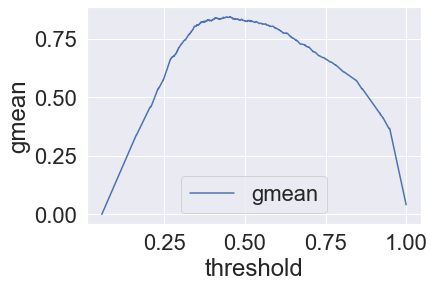

In [115]:
g_mean_opt.plot(x='threshold', y='gmean')
plt.xlabel("threshold")
plt.ylabel("gmean")

In [116]:
best_threshold = g_mean_opt.loc[g_mean_opt["gmean"].argmax(), 'threshold']

In [117]:
best_threshold

0.45382326083442037

In [118]:
y_pred_proba

array([0.15181683, 0.6131946 , 0.2382493 , ..., 0.28553878, 0.98672207,
       0.91763781])

In [119]:
y_pred_proba > best_threshold

array([False,  True, False, ..., False,  True,  True])

In [120]:
y_pred = y_pred_proba > best_threshold

In [121]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.9206269526909553

In [122]:
from sklearn.metrics import confusion_matrix

In [123]:
import seaborn as sns
sns.set(font_scale=2)

<AxesSubplot:>

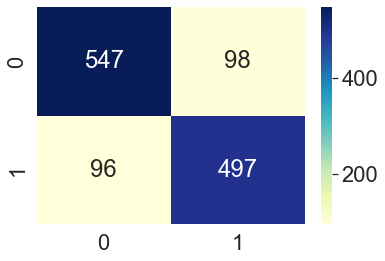

In [124]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="YlGnBu", annot=True, fmt="d")

# Binary Random Forest

In [125]:
#Now trying with random forest
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

rf = RandomForestClassifier()
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [126]:
rf

RandomForestClassifier()

In [127]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 800, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(80, 90, num = 11)]  
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [800, 822, 844, 866, 888, 911, 933, 955, 977, 1000]}


In [128]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, 
                               verbose=3, random_state=42, n_jobs = -1, scoring='roc_auc')
%time rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

CPU times: user 32.4 s, sys: 336 ms, total: 32.7 s
Wall time: 6min 34s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 81, 82, 83, 84, 85,
                                                      86, 87, 88, 89, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [800, 822, 844, 866,
                                                         888, 911, 933, 955,
                                                         977, 1000]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [129]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(bootstrap=False, max_depth=86, max_features='auto',
                       n_estimators=844)

In [130]:
rf_random.best_params_

{'n_estimators': 844,
 'max_features': 'auto',
 'max_depth': 86,
 'bootstrap': False}

In [131]:
y_pred = best_random.predict(X_test)

In [132]:
y_pred[:10]

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [133]:
y_test[:10]

3719     0
21580    1
18823    0
4525     1
13621    1
10043    1
2395     1
11263    1
17897    1
26590    0
Name: java_boolean, dtype: int64

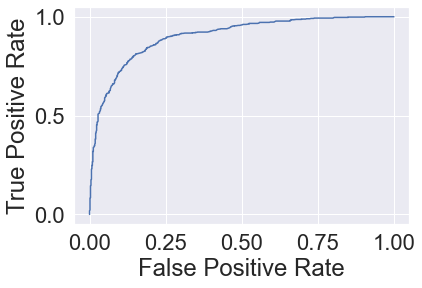

In [254]:
# Random Forest ROC Curve

y_pred_proba = best_random.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thr_rf = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr_rf,tpr_rf)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [255]:
#AUC score rf
metrics.roc_auc_score(y_test, y_pred_proba) # y_pred_proba_rf car score

0.9018379805744016

In [136]:
#Calculating g_mean for random forest
g_mean_rf = []
for tp, fp, th in zip(fpr_rf[1:], tpr_rf[1:], thr_rf[1:]):
    g_mean = np.sqrt(tp*(1-fp))
    g_mean_rf.append((th, g_mean))

Text(0, 0.5, 'gmean_rf')

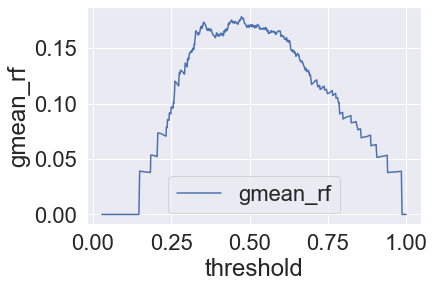

In [137]:
g_mean_rf = pd.DataFrame(g_mean_rf, columns=["threshold", "gmean_rf"])
g_mean_rf.plot(x='threshold', y='gmean_rf')
plt.xlabel("threshold")
plt.ylabel("gmean_rf")

In [138]:
best_rf_threshold = g_mean_rf.loc[g_mean_rf["gmean_rf"].argmax(), 'threshold']

In [139]:
g_mean_rf.loc[g_mean_rf["gmean_rf"].argmax()]

threshold    0.473934
gmean_rf     0.178259
Name: 250, dtype: float64

In [140]:
best_rf_threshold

0.47393364928909953

In [256]:
y_pred_rf = y_pred_proba > best_rf_threshold

In [142]:
y_pred_rf

array([False,  True, False, ..., False,  True,  True])

<AxesSubplot:>

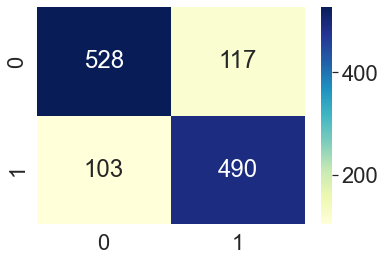

In [257]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), cmap="YlGnBu", annot=True, fmt="d")

# Multi class Random Forest + Unsupervised LDA

In [144]:
# prendre 7 classes et rebalancer le dataset
tags.value_counts()[:7]

python        3129
java          3094
javascript    2739
c#            2673
ios           2410
android       2015
c++           1852
dtype: int64

In [145]:
tags_dataframe

,0,1,2,3,4
0,r,ggplot2,boxplot,continuous,r-factor
1,linux,unix,process,path,environment
2,c#,windows,usb,monitoring,usb-flash-drive
3,c++,unit-testing,testing,visual-studio-2008,frameworks
4,c#,asp.net,.net,path,mappath
...,...,...,...,...,...
27583,linux,centos,vagrant,virtualbox,redhat
27584,python,macos,terminal,atom-editor,macos-monterey
27585,c++,pointers,language-lawyer,void-pointers,pointer-conversion
27586,assembly,optimization,x86-64,cpu-architecture,simd


In [146]:
classes_to_keep = tags.value_counts()[:7].index

In [147]:
classes_to_keep

Index(['python', 'java', 'javascript', 'c#', 'ios', 'android', 'c++'], dtype='object')

In [148]:
tags_dataframe_top7 = tags_dataframe[tags_dataframe[tags_dataframe.isin(classes_to_keep).sum(axis=1) == 1].isin(classes_to_keep)].dropna(how='all')

In [149]:
tags_dataframe_top7

,0,1,2,3,4
2,c#,NaN,NaN,NaN,NaN
3,c++,NaN,NaN,NaN,NaN
4,c#,NaN,NaN,NaN,NaN
5,javascript,NaN,NaN,NaN,NaN
6,javascript,NaN,NaN,NaN,NaN
...,...,...,...,...,...
27581,javascript,NaN,NaN,NaN,NaN
27582,python,NaN,NaN,NaN,NaN
27584,python,NaN,NaN,NaN,NaN
27585,c++,NaN,NaN,NaN,NaN


In [150]:
target = tags_dataframe_top7.fillna("").sum(axis=1)
target.name = "tag"

In [151]:
target.value_counts()

python        3000
javascript    2553
c#            2530
java          2499
ios           2272
c++           1708
android       1421
Name: tag, dtype: int64

In [152]:
x_reduced_top7 = x_reduced[target.index, :]

In [153]:
x_reduced_top7.shape

(15983, 100)

In [154]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [155]:
mlb_target = MultiLabelBinarizer()  

In [156]:
target_encoded_top7 = mlb_target.fit_transform(target.values.reshape(-1, 1))

In [157]:
joblib.dump(mlb_target, "mlb_target.pkl")

['mlb_target.pkl']

In [158]:
pd.DataFrame(target_encoded_top7, columns=mlb_target.classes_, index=target.index)

,android,c#,c++,ios,java,javascript,python
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
27581,0,0,0,0,0,1,0
27582,0,0,0,0,0,0,1
27584,0,0,0,0,0,0,1
27585,0,0,1,0,0,0,0


In [159]:
target

2                c#
3               c++
4                c#
5        javascript
6        javascript
            ...    
27581    javascript
27582        python
27584        python
27585           c++
27587        python
Name: tag, Length: 15983, dtype: object

In [160]:
x_reduced_top7

array([[ 0.12285636, -0.04724953, -0.02401607, ...,  0.02159486,
        -0.03101338,  0.00274503],
       [ 0.10096321, -0.03635456,  0.02137872, ...,  0.03415261,
        -0.02772714, -0.02948024],
       [ 0.11397276, -0.10920782,  0.07559138, ...,  0.03042351,
        -0.0077512 , -0.04496954],
       ...,
       [ 0.15635312, -0.07183259,  0.09077702, ...,  0.00341351,
        -0.02538117,  0.00082523],
       [ 0.13090177,  0.04963623, -0.01143302, ..., -0.00114422,
        -0.03998964,  0.05358023],
       [ 0.08039682,  0.05523445,  0.03240713, ..., -0.03399767,
         0.0207449 , -0.00477607]])

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_reduced_top7, target_encoded_top7, test_size=0.2, random_state=42)

In [162]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [163]:
x_top7 = X[target.index, :]

In [164]:
x_top7

<15983x266619 sparse matrix of type '<class 'numpy.float64'>'
	with 1003628 stored elements in Compressed Sparse Row format>

In [165]:
# Unsupervised LDA
search_params = {
    'n_components': [50], #np.linspace(40, 60, 3, dtype=int),
    'learning_decay': [0.7],#[0.6, 0.7, 0.8],
    'max_iter': [10]#[8, 12, 15, 20, 25]
}

In [166]:
np.random.seed(2018)
trn_idx = np.random.permutation(x_top7.shape[0])
x_top7_shuffled = x_top7[trn_idx]
# shuffle indices to prevent uneven distribution of questions among CV sets

In [167]:
from gensim.models.ldamodel import LdaModel

In [168]:
from gensim.corpora.dictionary import Dictionary

In [169]:
# ["would", "if", "then", "for", "like", "want"]  # stopwords to add

In [170]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

In [171]:
phrase_model = Phrases(x_cleaned, min_count=1, threshold=3, connector_words=ENGLISH_CONNECTOR_WORDS)


In [172]:
x_cleaned_bg = [phrase_model[item] for item in x_cleaned]

In [173]:
x_cleaned[3]

['im',
 'trouble',
 'figuring',
 'get',
 'testing',
 'framework',
 'set',
 'usable',
 'visual',
 'studio',
 '2008',
 'c++',
 'presumably',
 'builtin',
 'unit',
 'testing',
 'suite',
 'link',
 'tutorial',
 'would',
 'appreciated',
 'set',
 'unit',
 'testing',
 'visual',
 'studio',
 'c++']

In [174]:
x_cleaned_bg[3]

['im_trouble',
 'figuring_get',
 'testing_framework',
 'set',
 'usable',
 'visual_studio',
 '2008_c++',
 'presumably',
 'builtin',
 'unit_testing',
 'suite',
 'link_tutorial',
 'would_appreciated',
 'set',
 'unit_testing',
 'visual_studio',
 'c++']

In [175]:
so_dictionary = Dictionary(x_cleaned_bg)

In [176]:
so_corpus = [so_dictionary.doc2bow(text) for text in x_cleaned_bg]

In [177]:
import logging
logging.basicConfig(filename='gensim.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

In [178]:
# checking perplexity convergence in gensim.log ensures LDA has converged

In [179]:
num_topics_grid = np.linspace(50, 70, 5, dtype=int)
decay_grid = [0.3, 0.5, 0.7]


In [180]:
from itertools import product

In [181]:
from sklearn.metrics import silhouette_score

In [182]:
params_grid = list(product(num_topics_grid, decay_grid))

In [183]:
params_grid

[(50, 0.3),
 (50, 0.5),
 (50, 0.7),
 (55, 0.3),
 (55, 0.5),
 (55, 0.7),
 (60, 0.3),
 (60, 0.5),
 (60, 0.7),
 (65, 0.3),
 (65, 0.5),
 (65, 0.7),
 (70, 0.3),
 (70, 0.5),
 (70, 0.7)]

In [184]:
optim_results = []
for n_topics, decay in tqdm(params_grid, total=len(params_grid)):
    lda = LdaModel(
        so_corpus, num_topics=n_topics, decay=decay, offset=50., random_state=42,
        update_every=1, eval_every=1, iterations=100
    )
    main_topics = [lda.get_document_topics(item)[0][0] for item in so_corpus]
    df_main_topic = pd.DataFrame(main_topics, columns=["main_topic"])
    df_main_topic_subsample = pd.concat([df_main_topic, target], join='inner', axis=1)
    score = silhouette_score(x_reduced_top7, df_main_topic_subsample["main_topic"])    
    optim_results.append({"n_topics": n_topics, "decay": decay, "silhouette": score})

 20%|████████▊                                   | 3/15 [03:56<15:24, 77.06s/it]

[CV 3/3] END bootstrap=False, max_depth=82, max_features=auto, n_estimators=911;, score=0.910 total time= 1.0min
[CV 2/3] END bootstrap=False, max_depth=85, max_features=auto, n_estimators=955;, score=0.911 total time= 1.1min
[CV 2/3] END bootstrap=True, max_depth=84, max_features=auto, n_estimators=844;, score=0.910 total time=  36.3s
[CV 1/3] END bootstrap=False, max_depth=80, max_features=auto, n_estimators=955;, score=0.911 total time=  56.9s
[CV 3/3] END bootstrap=True, max_depth=90, max_features=sqrt, n_estimators=977;, score=0.910 total time=  42.4s
[CV 1/3] END bootstrap=True, max_depth=83, max_features=sqrt, n_estimators=933;, score=0.910 total time=  37.6s
[CV 1/3] END bootstrap=False, max_depth=90, max_features=sqrt, n_estimators=888;, score=0.911 total time=  43.2s
[CV 1/3] END bootstrap=False, max_depth=86, max_features=auto, n_estimators=955;, score=0.910 total time= 1.1min
[CV 3/3] END bootstrap=False, max_depth=85, max_features=auto, n_estimators=955;, score=0.911 total

100%|███████████████████████████████████████████| 15/15 [22:19<00:00, 89.30s/it]


In [185]:
df_optim_results = pd.DataFrame(optim_results)

In [186]:
df_optim_results

,n_topics,decay,silhouette
0,50,0.3,-0.252263
1,50,0.5,-0.194535
2,50,0.7,-0.298397
3,55,0.3,-0.159896
4,55,0.5,-0.174403
5,55,0.7,-0.280728
6,60,0.3,-0.133242
7,60,0.5,-0.238309
8,60,0.7,-0.206264
9,65,0.3,-0.197461


In [187]:
best_params = df_optim_results.loc[df_optim_results["silhouette"].argmax()]

In [188]:
best_params

n_topics      60.000000
decay          0.300000
silhouette    -0.133242
Name: 6, dtype: float64

In [189]:
lda = LdaModel(
        so_corpus, num_topics=best_params["n_topics"], decay=best_params["decay"], offset=50., random_state=42,
        update_every=1, eval_every=1, iterations=100
    )

In [190]:
topics_per_doc = lda.get_topics()

In [191]:
topics_per_doc = [lda.get_document_topics(item) for item in so_corpus]

In [192]:
topics_per_doc

[[(12, 0.67878693), (23, 0.1706437), (54, 0.13153064)],
 [(3, 0.16601187), (12, 0.7531889)],
 [(3, 0.034878388), (12, 0.8210712), (23, 0.120726764)],
 [(3, 0.20110467), (12, 0.7382335)],
 [(12, 0.8940649), (24, 0.048322845)],
 [(3, 0.040184353), (12, 0.17705736), (59, 0.7493667)],
 [(11, 0.010661008), (12, 0.49643776), (18, 0.010668587), (23, 0.47420993)],
 [(12, 0.9125833), (19, 0.05816213), (27, 0.014004134)],
 [(12, 0.9740928)],
 [(3, 0.016499866), (12, 0.19488147), (23, 0.776262)],
 [(3, 0.15844986), (12, 0.697805)],
 [(12, 0.91969913), (23, 0.057688173)],
 [(3, 0.31996635), (12, 0.59914345), (59, 0.042703986)],
 [(3, 0.051588833), (12, 0.925581)],
 [(12, 0.8899265)],
 [(12, 0.8768076)],
 [(12, 0.90575486), (23, 0.07321041)],
 [(12, 0.895944), (23, 0.056311846), (59, 0.027375393)],
 [(12, 0.9588268)],
 [(3, 0.11121083), (12, 0.86251485)],
 [(12, 0.8591832)],
 [(12, 0.59731174), (27, 0.2952243)],
 [(12, 0.96830416)],
 [(12, 0.89991945), (59, 0.062131356)],
 [(12, 0.93508846), (27, 0

In [193]:
topics_per_doc = [[subitem[0] for subitem in item] for item in topics_per_doc]

In [194]:
topics_per_doc

[[12, 23, 54],
 [3, 12],
 [3, 12, 23],
 [3, 12],
 [12, 24],
 [3, 12, 59],
 [11, 12, 18, 23],
 [12, 19, 27],
 [12],
 [3, 12, 23],
 [3, 12],
 [12, 23],
 [3, 12, 59],
 [3, 12],
 [12],
 [12],
 [12, 23],
 [12, 23, 59],
 [12],
 [3, 12],
 [12],
 [12, 27],
 [12],
 [12, 59],
 [12, 27],
 [12, 27],
 [3, 12, 42],
 [3, 12, 51],
 [12],
 [12],
 [12],
 [12],
 [11, 12, 27],
 [12, 42, 59],
 [12, 59],
 [12, 59],
 [3, 12],
 [12],
 [12],
 [12],
 [12, 27],
 [12, 59],
 [12, 16, 27],
 [12, 23, 59],
 [12, 23],
 [12],
 [3, 12],
 [12, 16],
 [12],
 [12, 23, 27],
 [12, 23],
 [12],
 [12],
 [12, 33],
 [12, 59],
 [3, 12],
 [12, 41],
 [11, 12],
 [12, 23],
 [12, 54],
 [12],
 [12, 57],
 [12, 13],
 [12],
 [12, 59],
 [3, 12, 44],
 [2, 3, 12],
 [12, 19],
 [12, 59],
 [3, 12],
 [12],
 [12],
 [3, 12, 23],
 [12, 15],
 [3, 12],
 [11, 12, 24],
 [12],
 [3, 12],
 [12, 59],
 [12, 27, 59],
 [3, 12],
 [12],
 [3, 12, 13],
 [12],
 [3, 12, 36],
 [12],
 [12, 19],
 [59],
 [12],
 [12],
 [12, 59],
 [12, 16, 59],
 [12],
 [12],
 [12, 28, 59],

In [195]:
topics = pd.Series(topics_per_doc).apply(pd.Series).stack()
topics = topics.astype(int)
topics = topics.droplevel(1)
topics.index.name = "document"
topics.name = "lda_topic"
df_topics = topics.reset_index()

In [196]:
df_topics.shape

(61600, 2)

In [197]:
target.shape

(15983,)

In [198]:
df_topics["target"] = df_topics["document"].apply(lambda x: target.get(x))

In [199]:
df_topics = df_topics.dropna()

In [200]:
df_topics

,document,lda_topic,target
5,2,3,c#
6,2,12,c#
7,2,23,c#
8,3,3,c++
9,3,12,c++
...,...,...,...
61591,27585,12,c++
61592,27585,23,c++
61593,27585,27,c++
61598,27587,12,python


In [201]:
data_crosstab = pd.crosstab(df_topics["lda_topic"], df_topics["target"])

In [264]:
def plot_crosstab(crosstab_data):
    for idx, row in crosstab_data.iterrows():
        crosstab_data.loc[idx, :] = (100 * row / sum(row))
    crosstab_data.plot(kind="barh", stacked=True, figsize=(10, 20))
    plt.title(f"language by topic")
    plt.xlabel("% of documents")
    plt.ylabel("topic")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
   
    

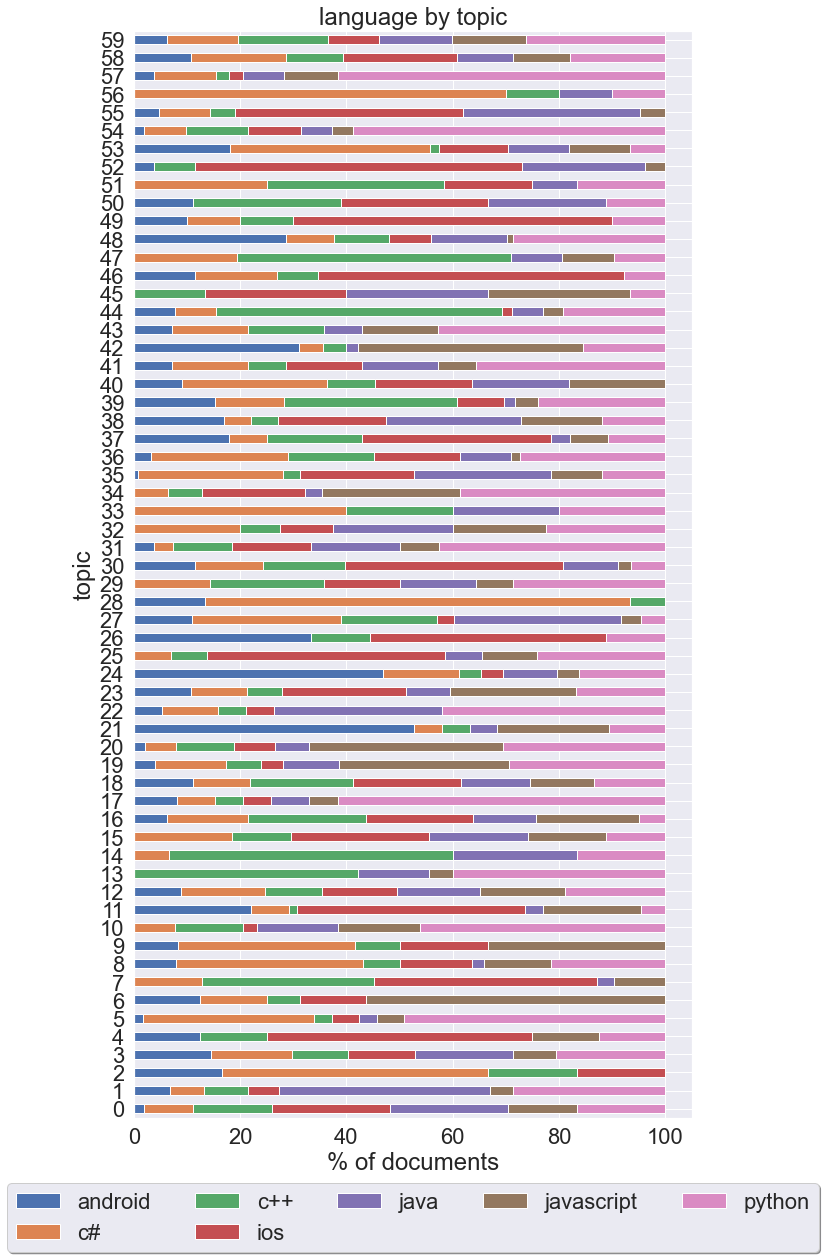

In [265]:
plot_crosstab(data_crosstab)

In [204]:
# topic 6 : javascript
# topic 28 : c#
# topic 52 : ios
# topic 54 : python
# topic 21 : android

In [205]:
# results are promising, but insatisfactory
# improvement ideas :
# 1. better preprocessing : remove stopwords specific to corpus (if, for, then, def, function, class...)
# 2. better parameter finetuning : finetune another parameters
# 3. better understanding of clusters

In [206]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(rf)

In [207]:
X_train.shape

(12786, 100)

In [214]:
y_train.shape

(12786, 7)

In [209]:
# Number of trees in random forest
n_estimators = [500]  ##[int(x) for x in np.linspace(start = 100, stop = 300, num = 3)]
# Number of features to consider at every split
max_features = ['auto'] #['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 100, num = 10)]  
bootstrap = [True]  #[True, False]
random_grid = {'estimator__n_estimators': n_estimators,
               'estimator__max_features': max_features,
               'estimator__max_depth': max_depth,
               'estimator__bootstrap': bootstrap}
pprint(random_grid)

{'estimator__bootstrap': [True],
 'estimator__max_depth': [50, 55, 61, 66, 72, 77, 83, 88, 94, 100],
 'estimator__max_features': ['auto'],
 'estimator__n_estimators': [500]}


In [215]:
rf_random_mc = RandomizedSearchCV(estimator = ovr, param_distributions = random_grid, n_iter = 15, cv = 3, 
                               verbose=8, random_state=42, n_jobs = -1, scoring='roc_auc')
%time rf_random_mc.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 10 is smaller than n_iter=15. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClas

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

[CV 2/3] END estimator__bootstrap=True, estimator__max_depth=55, estimator__max_features=auto, estimator__n_estimators=500;, score=0.944 total time= 7.6min
[CV 1/3] END estimator__bootstrap=True, estimator__max_depth=72, estimator__max_features=auto, estimator__n_estimators=500;, score=0.937 total time= 7.5min
[CV 1/3] END estimator__bootstrap=True, estimator__max_depth=88, estimator__max_features=auto, estimator__n_estimators=500;, score=0.937 total time= 7.5min
[CV 1/3] END estimator__bootstrap=True, estimator__max_depth=55, estimator__max_features=auto, estimator__n_estimators=500;, score=0.937 total time= 7.6min
[CV 1/3] END estimator__bootstrap=True, estimator__max_depth=77, estimator__max_features=auto, estimator__n_estimators=500;, score=0.936 total time= 7.5min
[CV 2/3] END estimator__bootstrap=True, estimator__max_depth=88, estimator__max_features=auto, estimator__n_estimators=500;, score=0.943 total time= 7.5min


/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_featur

[CV 3/3] END estimator__bootstrap=True, estimator__max_depth=50, estimator__max_features=auto, estimator__n_estimators=500;, score=0.939 total time= 7.6min
[CV 3/3] END estimator__bootstrap=True, estimator__max_depth=61, estimator__max_features=auto, estimator__n_estimators=500;, score=0.939 total time= 7.5min
[CV 2/3] END estimator__bootstrap=True, estimator__max_depth=77, estimator__max_features=auto, estimator__n_estimators=500;, score=0.944 total time= 7.5min
[CV 1/3] END estimator__bootstrap=True, estimator__max_depth=94, estimator__max_features=auto, estimator__n_estimators=500;, score=0.937 total time= 5.9min
[CV 3/3] END estimator__bootstrap=True, estimator__max_depth=55, estimator__max_features=auto, estimator__n_estimators=500;, score=0.939 total time= 7.6min
[CV 1/3] END estimator__bootstrap=True, estimator__max_depth=66, estimator__max_features=auto, estimator__n_estimators=500;, score=0.936 total time= 7.6min
[CV 3/3] END estimator__bootstrap=True, estimator__max_depth=83,

/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/stanislasbocearov/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


CPU times: user 7min 4s, sys: 1.33 s, total: 7min 6s
Wall time: 35min 43s


RandomizedSearchCV(cv=3,
                   estimator=OneVsRestClassifier(estimator=RandomForestClassifier()),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'estimator__bootstrap': [True],
                                        'estimator__max_depth': [50, 55, 61, 66,
                                                                 72, 77, 83, 88,
                                                                 94, 100],
                                        'estimator__max_features': ['auto'],
                                        'estimator__n_estimators': [500]},
                   random_state=42, scoring='roc_auc', verbose=8)

In [216]:
rf_random_mc.best_params_ 

{'estimator__n_estimators': 500,
 'estimator__max_features': 'auto',
 'estimator__max_depth': 72,
 'estimator__bootstrap': True}

In [217]:
best_rf_mc = rf_random_mc.best_estimator_
best_rf_mc

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=72,
                                                     max_features='auto',
                                                     n_estimators=500))

In [269]:
joblib.dump(best_rf_mc, "nlp_stackoverflow_lda_final/model.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'nlp_stackoverflow/model.pkl'

In [219]:
y_pred_proba = best_rf_mc.predict_proba(X_test)

In [220]:
y_pred_proba.shape

(3197, 7)

In [221]:
y_pred_proba

array([[0.01 , 0.038, 0.02 , ..., 0.038, 0.018, 0.952],
       [0.028, 0.052, 0.026, ..., 0.132, 0.056, 0.65 ],
       [0.124, 0.364, 0.076, ..., 0.292, 0.05 , 0.266],
       ...,
       [0.042, 0.514, 0.286, ..., 0.046, 0.068, 0.048],
       [0.008, 0.12 , 0.014, ..., 0.054, 0.82 , 0.05 ],
       [0.012, 0.102, 0.022, ..., 0.508, 0.056, 0.076]])

In [222]:
pd.Series(y_pred_proba.reshape(-1)).value_counts()

0.026    377
0.028    376
0.024    348
0.016    346
0.030    346
        ... 
0.588      1
0.438      1
1.000      1
0.994      1
0.998      1
Length: 501, dtype: int64

In [223]:
y_pred_labels = [mlb_target.classes_[item] for item in y_pred_proba.argmax(axis=1)]

In [224]:
y_pred_labels

['python',
 'python',
 'c#',
 'ios',
 'python',
 'javascript',
 'ios',
 'java',
 'javascript',
 'javascript',
 'javascript',
 'c#',
 'javascript',
 'python',
 'javascript',
 'c++',
 'python',
 'ios',
 'python',
 'python',
 'c#',
 'c#',
 'javascript',
 'python',
 'c#',
 'python',
 'java',
 'c#',
 'c#',
 'java',
 'android',
 'python',
 'python',
 'python',
 'javascript',
 'c#',
 'python',
 'python',
 'ios',
 'javascript',
 'java',
 'ios',
 'c++',
 'c#',
 'javascript',
 'c#',
 'python',
 'java',
 'python',
 'c#',
 'javascript',
 'ios',
 'python',
 'c++',
 'python',
 'ios',
 'python',
 'ios',
 'python',
 'c#',
 'ios',
 'python',
 'javascript',
 'python',
 'ios',
 'javascript',
 'c++',
 'android',
 'javascript',
 'javascript',
 'c++',
 'android',
 'ios',
 'python',
 'android',
 'java',
 'c++',
 'python',
 'java',
 'c#',
 'ios',
 'javascript',
 'c#',
 'ios',
 'python',
 'python',
 'javascript',
 'ios',
 'java',
 'javascript',
 'android',
 'c#',
 'javascript',
 'c++',
 'java',
 'c#',
 'c#',
 

In [225]:
y_pred_proba.argmax(axis=1)

array([6, 6, 1, ..., 1, 5, 4])

In [226]:
y_test_labels = [item[0] for item in mlb_target.inverse_transform(y_test)]

In [227]:
y_test_labels

['python',
 'python',
 'c#',
 'android',
 'python',
 'javascript',
 'ios',
 'java',
 'javascript',
 'javascript',
 'javascript',
 'ios',
 'javascript',
 'python',
 'java',
 'c++',
 'python',
 'ios',
 'python',
 'python',
 'c#',
 'c#',
 'javascript',
 'python',
 'c#',
 'python',
 'java',
 'c#',
 'c#',
 'java',
 'android',
 'python',
 'python',
 'python',
 'javascript',
 'c#',
 'python',
 'python',
 'ios',
 'javascript',
 'android',
 'ios',
 'c++',
 'c#',
 'ios',
 'c#',
 'python',
 'java',
 'python',
 'c#',
 'ios',
 'ios',
 'python',
 'java',
 'python',
 'c#',
 'c#',
 'ios',
 'python',
 'c#',
 'ios',
 'python',
 'javascript',
 'python',
 'ios',
 'javascript',
 'c++',
 'android',
 'javascript',
 'javascript',
 'c++',
 'android',
 'ios',
 'python',
 'android',
 'java',
 'c++',
 'c++',
 'java',
 'c#',
 'ios',
 'c++',
 'c#',
 'android',
 'python',
 'python',
 'javascript',
 'ios',
 'android',
 'javascript',
 'android',
 'c#',
 'ios',
 'c++',
 'java',
 'c#',
 'c#',
 'c#',
 'c++',
 'java',
 'c

In [228]:
from sklearn.metrics import f1_score

print(f1_score(y_test_labels, y_pred_labels, average='macro'))
print(f1_score(y_test_labels, y_pred_labels, average='micro'))
print(f1_score(y_test_labels, y_pred_labels, average='weighted'))

0.7985931646263386
0.7982483578354708
0.7983659882434195


In [229]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_labels, y_pred_labels)

0.7982483578354708

In [230]:
m = confusion_matrix(y_test_labels, y_pred_labels)

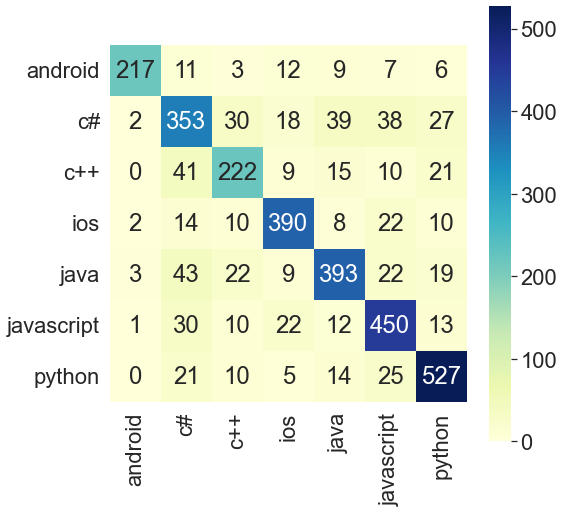

In [231]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 8))
_ = sns.heatmap(
    m, cmap="YlGnBu", annot=True, fmt="d", 
    xticklabels=mlb_target.classes_, yticklabels=mlb_target.classes_,
    square=True
)

In [232]:
def preprocess_single_document(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    to_lower = punctuationfree.lower()
    tokenizer = nltk.word_tokenize(to_lower)
    remove_sw = [i for i in tokenizer if i not in stopwords]
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in remove_sw]
    x_str = " ".join(lemm_text)
    X = vectorizer.transform([x_str])
    x_reduced = svd.transform(X)
    return x_reduced

In [233]:
def get_tag(text):
    x = preprocess_single_document(text)
    pred_proba = best_rf_mc.predict_proba(x) 
    tag = [mlb_target.classes_[item] for item in pred_proba.argmax(axis=1)]
    return tag

In [234]:
test_string = """How can I merge two Python dictionaries in a single expression?
For dictionaries x and y, their shallowly-merged dictionary z takes values from y, replacing those from x.

In Python 3.9.0 or greater (released 17 October 2020, PEP-584, discussed here):

z = x | y
In Python 3.5 or greater:

z = \{**x, **y\}
In Python 2, (or 3.4 or lower) write a function:

def merge_two_dicts(x, y):
    z = x.copy()   # start with keys and values of x
    z.update(y)    # modifies z with keys and values of y
    return z
and now:

z = merge_two_dicts(x, y)"""

In [235]:
test_string.encode("unicode_escape")

b'How can I merge two Python dictionaries in a single expression?\\nFor dictionaries x and y, their shallowly-merged dictionary z takes values from y, replacing those from x.\\n\\nIn Python 3.9.0 or greater (released 17 October 2020, PEP-584, discussed here):\\n\\nz = x | y\\nIn Python 3.5 or greater:\\n\\nz = \\\\{**x, **y\\\\}\\nIn Python 2, (or 3.4 or lower) write a function:\\n\\ndef merge_two_dicts(x, y):\\n    z = x.copy()   # start with keys and values of x\\n    z.update(y)    # modifies z with keys and values of y\\n    return z\\nand now:\\n\\nz = merge_two_dicts(x, y)'

In [236]:
test_string_2 = """I've looked everywhere and can't find a solid answer. According to the documentation, Java throws a java.lang.StackOverflowError error under the following circumstance:

Thrown when a stack overflow occurs because an application recurses too deeply.

But this raises two questions:

Aren't there other ways for a stack overflow to occur, not only through recursion?
Does the StackOverflowError happen before the JVM actually overflows the stack or after?
To elaborate on the second question:

When Java throws the StackOverflowError, can you safely assume that the stack did not write into the heap? If you shrink the size of the stack or heap in a try/catch on a function that throws a stack overflow, can you continue working? Is this documented anywhere?

Answers I am not looking for:

A StackOverflow happens because of bad recursion.
A StackOverflow happens when the heap meets the stack."""

In [237]:
test_string_2.encode("unicode_escape").decode('utf-8')

"I've looked everywhere and can't find a solid answer. According to the documentation, Java throws a java.lang.StackOverflowError error under the following circumstance:\\n\\nThrown when a stack overflow occurs because an application recurses too deeply.\\n\\nBut this raises two questions:\\n\\nAren't there other ways for a stack overflow to occur, not only through recursion?\\nDoes the StackOverflowError happen before the JVM actually overflows the stack or after?\\nTo elaborate on the second question:\\n\\nWhen Java throws the StackOverflowError, can you safely assume that the stack did not write into the heap? If you shrink the size of the stack or heap in a try/catch on a function that throws a stack overflow, can you continue working? Is this documented anywhere?\\n\\nAnswers I am not looking for:\\n\\nA StackOverflow happens because of bad recursion.\\nA StackOverflow happens when the heap meets the stack."

In [238]:
import json

In [239]:
json.dumps({"text": test_string_2})

'{"text": "I\'ve looked everywhere and can\'t find a solid answer. According to the documentation, Java throws a java.lang.StackOverflowError error under the following circumstance:\\n\\nThrown when a stack overflow occurs because an application recurses too deeply.\\n\\nBut this raises two questions:\\n\\nAren\'t there other ways for a stack overflow to occur, not only through recursion?\\nDoes the StackOverflowError happen before the JVM actually overflows the stack or after?\\nTo elaborate on the second question:\\n\\nWhen Java throws the StackOverflowError, can you safely assume that the stack did not write into the heap? If you shrink the size of the stack or heap in a try/catch on a function that throws a stack overflow, can you continue working? Is this documented anywhere?\\n\\nAnswers I am not looking for:\\n\\nA StackOverflow happens because of bad recursion.\\nA StackOverflow happens when the heap meets the stack."}'

In [240]:
preprocess_single_document(test_string).shape

(1, 100)

In [241]:
get_tag(test_string)

['python']

In [242]:
get_tag(test_string_2)

['java']